In [1]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, color

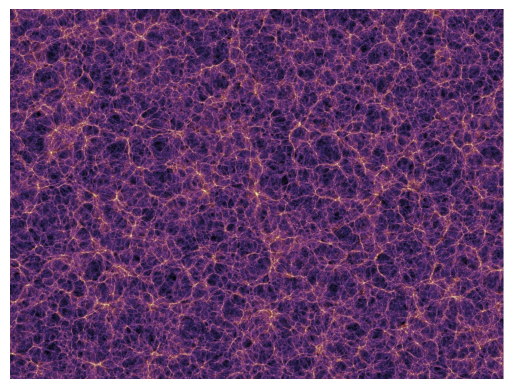

In [2]:
image = cv2.imread("filaments.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

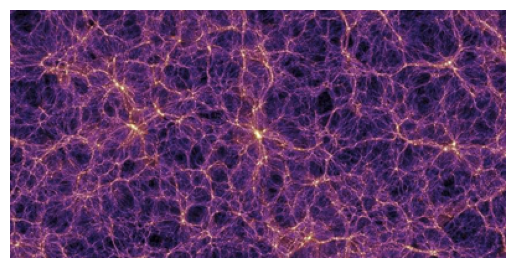

In [3]:
# Cropping image
image_rgb.shape
alto, ancho, canales = image_rgb.shape
start_x = (ancho - 400) // 2
start_y = (alto - 200) // 2
region_central = image_rgb[start_y:start_y+200, start_x:start_x+400]
plt.imshow(region_central, cmap="gray"), plt.axis("off")
plt.show()

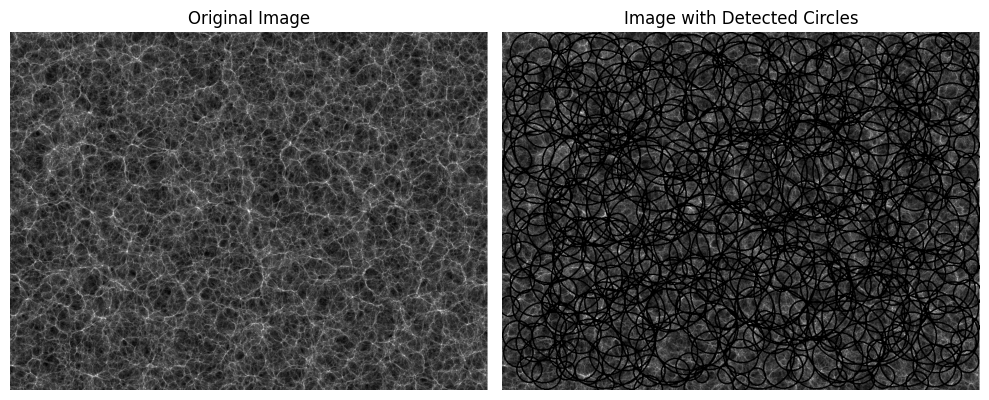

In [21]:
image = cv2.imread("filaments.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Apply Gaussian blur to reduce noise and improve circle detection
blurred_image = cv2.GaussianBlur(image, (9, 9), 2)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
    param1=50, param2=30, minRadius=1, maxRadius=100
)

# Draw detected circles on a copy of the original image
circle_image = np.copy(image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(circle_image, center, radius, (0, 255, 0), 2)
        
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(circle_image, cmap='gray')
plt.title('Image with Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()

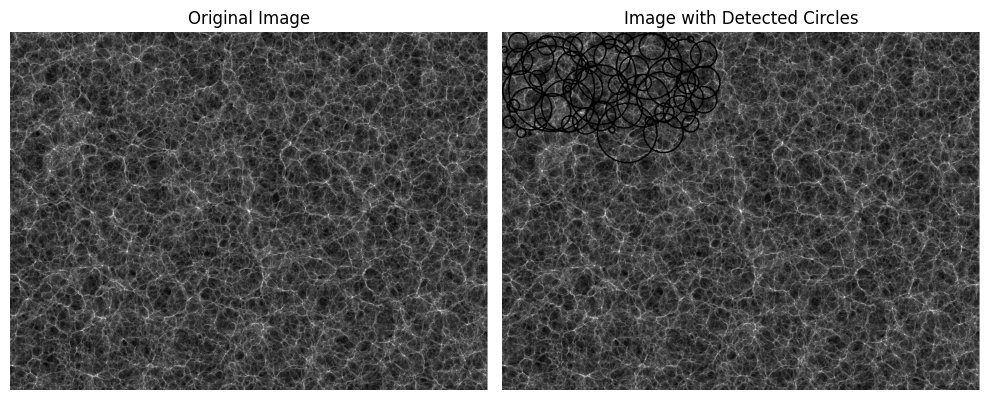

In [31]:
image = cv2.imread("filaments.png", cv2.IMREAD_GRAYSCALE)

# Cropping image
image.shape
alto, ancho = image.shape
start_x = (ancho - 400) // 2
start_y = (alto - 200) // 2
region_central = image[start_y:start_y+200, start_x:start_x+400]

# Apply Gaussian blur to reduce noise and improve circle detection
blurred_image = cv2.GaussianBlur(region_central, (9, 9), 2)

# Apply Hough Circle Transform
circles = cv2.HoughCircles(
    blurred_image, cv2.HOUGH_GRADIENT, dp=3, minDist=30,
    param1=10, param2=20, minRadius=1, maxRadius=100
)

# Draw detected circles on a copy of the original image
circle_image = np.copy(image)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])
        radius = circle[2]
        cv2.circle(circle_image, center, radius, (0, 255, 0), 2)
        
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(circle_image, cmap='gray')
plt.title('Image with Detected Circles')
plt.axis('off')

plt.tight_layout()
plt.show()

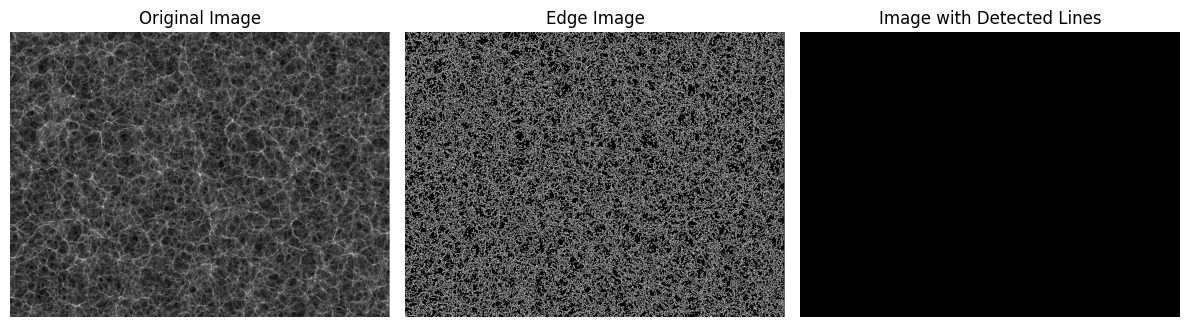

In [7]:
image = cv2.imread("filaments.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

edges = cv2.Canny(image, threshold1=110, threshold2=150)  # Apply Canny edge detection
lines = cv2.HoughLines(edges, 1, np.pi/180, threshold=120)  # Apply Hough Line Transform

# Draw the detected lines on a copy of the original image
line_image = np.copy(image)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(line_image, cmap='gray')
plt.title('Image with Detected Lines')
plt.axis('off')

plt.tight_layout()
plt.show()

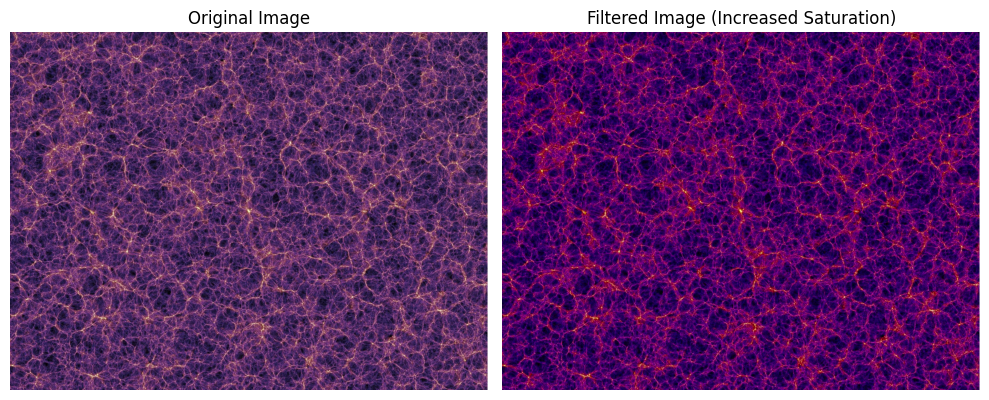

In [22]:
image = cv2.imread("filaments.png")  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Convert the image to the HSL color space
image_hsl = color.rgb2hsv(image_rgb)  # HSL is the same as HSV

# Apply the saturation filter (increase saturation)
saturation_factor = 2.0  # Adjust the saturation factor as desired
image_hsl[:, :, 1] *= saturation_factor
image_hsl[:, :, 1] = np.clip(image_hsl[:, :, 1], 0, 1)  # Ensure values stay within [0, 1]

# Convert the modified HSL image back to RGB
filtered_image_rgb = color.hsv2rgb(image_hsl)

# Display the original image and the filtered image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rgb)
plt.title('Filtered Image (Increased Saturation)')
plt.axis('off')
plt.tight_layout()
plt.show()